In [1]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import pathlib

from modules.plots import *

In [176]:
EVERY_KTH_EPOCH = True
READ_EPOCH_CSVS = False

LAST_EPOCH = True

METRICS = ['PSNR', 'SSIM', 'NIQE', 'Ma', 'PI']
EXPERIMENTS = ['e01-8', 'e01-6', 'e01-4', 'e01-3', 'e02-4', 'e04-4']
EXPERIMENTS = ['e01-8', 'e01-6', 'e01-4', 'e01-3']
EXPERIMENTS = ['e01-4', 'e04-4', 'e05-4', 'e06-4']
#EXPERIMENTS = ['e07-4']
#EXPERIMENTS = ['e01-4', 'e06-4', 'e07-4']
#EXPERIMENTS = ['e01-4', 'e06-4']
#EXPERIMENTS = ['e06-4']
#EXPERIMENTS = ['e01-4', 'e01-3']
#EXPERIMENTS = ['e01-8', 'e01-6', 'e01-4', 'e01-3', 'e02-4', 'e04-4', 'e03-3']

#EXPERIMENTS = ['e01-4', 'e01-6']
LOGS_DIR = 'logs'
    
PLOTLY_COLORS = get_plotly_standard_colors('hex')
PLOTLY_COLORS.append('#1F77B4')

LEGEND_NAMES = {'e01-8-WV02': 'm8: WorldView-2, 8 (all) bands', 
                'e01-6-WV02': 'm6: WorldView-2, 6 bands', 
                'e01-4-WV02': 'm4: WorldView-2, 4 bands', 
                'e01-3-WV02': 'm3: WorldView-2, 3 bands', 
                'e01-4-GE01': 'm4: GeoEye-1, 4 (all) bands',
                'e01-3-GE01': 'm3: GeoEye-1, 3 bands',
                'e04-4-WV02': 'm4-os: WorldView-2, 4 bands <br>            with oversampling (os)',
                'e04-4-GE01': 'm4-os: GeoEye-1, 4 (all) bands <br>            with oversampling (os)',
                'e05-4-WV02': 'm4-au: WorldView-2, 4 bands <br>            with augmentation (aug)',
                'e05-4-GE01': 'm4-au: GeoEye-1, 4 (all) bands <br>            with augmentation (aug)',
                'e06-4-WV02': 'm4-os-au: WorldView-2, 4 bands <br>                 with os and aug',
                'e06-4-GE01': 'm4-os-au: GeoEye-1, 4 (all) bands <br>                 with os and aug',
                'e07-4-WV02': 'm4-os-au-final: WorldView-2, 4 bands <br>                        with os and aug (test set)',
                'e07-4-GE01': 'm4-os-au-final: GeoEye-1, 4 (all) bands <br>                        with os and aug (test set)',
                }

LEGEND_COLORS = {'e01-8-WV02': PLOTLY_COLORS[0], 
                 'e01-6-WV02': PLOTLY_COLORS[1], 
                 'e01-4-WV02': PLOTLY_COLORS[2], 
                 'e01-3-WV02': PLOTLY_COLORS[3], 
                 'e01-4-GE01': PLOTLY_COLORS[2],
                 'e01-3-GE01': PLOTLY_COLORS[3],
                 'e04-4-WV02': PLOTLY_COLORS[4],
                 'e04-4-GE01': PLOTLY_COLORS[4],
                 'e05-4-WV02': PLOTLY_COLORS[5],
                 'e05-4-GE01': PLOTLY_COLORS[5], 
                 'e06-4-WV02': PLOTLY_COLORS[6],
                 'e06-4-GE01': PLOTLY_COLORS[6],
                 'e07-4-WV02': PLOTLY_COLORS[10],
                 'e07-4-GE01': PLOTLY_COLORS[10]
                }

METRIC_NAMES = {'PSNR': 'Peak Signal-to-Noise Ratio (PSNR)',
                'SSIM': 'Structural Similarity Index (SSIM)',
                'NIQE': 'Naturalness Image Quality Evaluator (NIQE)',
                'Ma': 'Ma et al. (Ma)',
                'PI': 'Perceptual Index (PI)'
                }

SENSOR_DASH = {'WV02': 'solid', 
               'GE01': 'dashdot'}

In [177]:
def read_epoch_csv(csv_path, metrics_filter):
    if isinstance(csv_path, str):
        csv_path = pathlib.Path(csv_path)
    df = pd.read_csv(csv_path)
    
    # Allow for metrics filter to include metrics not in this particular df
    metrics_set = set()
    metrics_set.update(metrics_filter)
    columns_set = set()
    columns_set.update(list(df.columns))
    metrics_filter = list(metrics_set.intersection(columns_set))
    
    # add tile_path to the list of columns to extract
    column_filter = []
    column_filter.append('ms_tile_path')
    [column_filter.append(column) for column in metrics_filter]
    df = df.loc[:, column_filter]
    return df

In [178]:
def path_to_columns(row):
    #print(row)
    path = row['ms_tile_path']
    #print(path)
    for town in ['_Toulon', '_La_Spezia_']:
        if town in path:
            #print(area)
            row['area'] = town.strip('_')
    for sensor in ['WV02', 'GE01']:
        if sensor in path:
            row['sensor'] = sensor
    for val_test in ['val', 'test']:
        if val_test in path:
            row['val_test'] = val_test
    row['image_UID'] = path[path.find('\\\\' + row['sensor'])+2:path.find('\\\\ms\\\\')]
    row['tile_UID'] = path[path.find('\\\\ms\\\\',)+6:-1]
    return row

In [179]:
def last_epoch(logs_dir, experiments):
    dfs = {}
    for experiment in experiments:
        csv_paths = list(pathlib.Path(logs_dir).joinpath(experiment).joinpath('csv').glob('final*.csv'))
        #print(csv_paths)
        for csv_path in csv_paths:
            name = experiment + '-' + csv_path.stem
            print(name)
            dfs[name] = read_epoch_csv(csv_path, metrics_filter=METRICS)
            dfs[name] = dfs[name].apply(path_to_columns, axis=1)
    return dfs

if LAST_EPOCH:
    dfs = last_epoch(LOGS_DIR, EXPERIMENTS)

e01-4-final_epoch-bicubic-val-GE01
e01-4-final_epoch-bicubic-val-WV02
e01-4-final_epoch-gan-val-GE01
e01-4-final_epoch-gan-val-WV02
e01-4-final_epoch-HR-val-GE01
e01-4-final_epoch-HR-val-WV02
e01-4-final_epoch-pre-val-GE01
e01-4-final_epoch-pre-val-WV02
e04-4-final_epoch-gan-val-GE01
e04-4-final_epoch-gan-val-WV02
e04-4-final_epoch-pre-val-GE01
e04-4-final_epoch-pre-val-WV02
e05-4-final_epoch-gan-val-GE01
e05-4-final_epoch-gan-val-WV02
e05-4-final_epoch-pre-val-GE01-ma_niqe_HR-
e05-4-final_epoch-pre-val-GE01
e05-4-final_epoch-pre-val-WV02
e06-4-final_epoch-gan-val-GE01
e06-4-final_epoch-gan-val-WV02
e06-4-final_epoch-pre-val-GE01
e06-4-final_epoch-pre-val-WV02


In [180]:
def every_kth_epoch(logs_dir, experiments):
    experiments_dict = {}
    for experiment in experiments:
        dfs = {}
        csv_paths = list(pathlib.Path(logs_dir).joinpath(experiment).joinpath('csv').glob('val*/*.csv'))
        csv_paths = csv_paths + list(pathlib.Path(logs_dir).joinpath(experiment).joinpath('csv').glob('test*/*.csv'))
        for i, csv_path in enumerate(csv_paths):
            print(csv_path)
            if 'gan' in csv_path.as_posix():
                epoch = csv_path.stem[12:]
                epoch = int(epoch) + 1
                print(epoch)
                epoch = str(epoch).zfill(3)
            elif 'pre' in csv_path.as_posix():
                epoch = csv_path.stem[10:]
                print(epoch)
                epoch = int(epoch)
                epoch = str(epoch).zfill(3)
            else:
                raise ValueError
            name = csv_path.parents[0].stem + '-' + csv_path.stem[6:9] + '-' + epoch
            print(name)
            dfs[name] = read_epoch_csv(csv_path, metrics_filter=METRICS)
            dfs[name] = dfs[name].apply(path_to_columns, axis=1)
            
        experiments_dict[experiment] = dfs
        
    return experiments_dict

if EVERY_KTH_EPOCH:
    if READ_EPOCH_CSVS:
        experiments_dict = every_kth_epoch(LOGS_DIR, EXPERIMENTS)
    else:
        experiments_dict = dict.fromkeys(EXPERIMENTS)
    print(experiments_dict)

{'e01-4': None, 'e04-4': None, 'e05-4': None, 'e06-4': None}


In [181]:
def stats_columns(row):
    if 'GE01' in row.name:
        row['sensor'] = 'GE01'
    elif 'WV02' in row.name:
        row['sensor'] = 'WV02'
    else:
        raise ValueError
    
    if 'pre' in row.name:
        row['pre_or_gan'] = 'pre'
    elif 'gan' in row.name:
        row['pre_or_gan'] = 'gan'
    else:
        raise ValueError

    row['epoch'] = int(row.name[-3:])
    print(row)
    return row    

def compute_epoch_statistics(dfs, statistic='mean', decimals=2):
    stats = {}
    for df_name in dfs.keys():
        #print(df_name)
        
        if statistic == 'mean':
            stats[df_name] = dfs[df_name].mean()
        elif statistic == 'median':
            stats[df_name] = dfs[df_name].median()
        elif statistic == 'std':
            stats[df_name] = dfs[df_name].std()
        elif statistic == 'count':
            stats[df_name] = dfs[df_name].count()
        elif statistic == 'sem':
            stats[df_name] = dfs[df_name].sem()
    stats = pd.DataFrame.from_dict(stats).transpose().round(decimals)
    #print(stats)
    stats = stats.apply(stats_columns, axis=1)
    stats = stats.astype({'epoch': 'int32'})
    stats['iterations'] = stats['epoch'] * 1000
    stats.sort_values(by=['sensor', 'pre_or_gan', 'epoch'], inplace=True)

    return stats

#df_mean = compute_epoch_statistics(experiments_dict['e01-4'], statistic='mean', 
#                                   decimals={'PSNR': 2, 'SSIM': 3, 'NIQE': 2, 'Ma': 2, 'PI': 2})
#df_median = compute_statistics(dfs, statistic='median')
#df_std = compute_statistics(dfs, statistic='std')
#df_count = compute_statistics(dfs, statistic='count')

# sem = standard error of the mean (with n-1)
#df_sem = compute_statistics(dfs, statistic='sem', decimals={'PSNR': 2, 'SSIM': 3, 'NIQE': 2, 'Ma': 2, 'PI': 2}) 
#df_mean

In [182]:
def compute_experiment_epoch_means(experiments_dict, save_to_csv=True, load_from_csv=False):
    exp_means = {}
    if save_to_csv and load_from_csv:
        raise ValueError('Do not load and save. Makes no sense.')
        
    for experiment, dfs in experiments_dict.items():
        print(experiment)
        csv_path = LOGS_DIR + '/' + experiment + '/csv/' + experiment + '-epoch-metrics.csv'
        if load_from_csv:
            stat_df = pd.read_csv(csv_path, index_col=0)
        else:
            stat_df = compute_epoch_statistics(dfs, statistic='mean', 
                                               decimals={'PSNR': 2, 'SSIM': 3, 'NIQE': 2, 'Ma': 2, 'PI': 2})
        if save_to_csv:
            stat_df.to_csv(csv_path)
        exp_means[experiment] = stat_df
    return exp_means

if EVERY_KTH_EPOCH:
    if READ_EPOCH_CSVS:
        stat_dict = compute_experiment_epoch_means(experiments_dict, save_to_csv=True, load_from_csv=False)
    else:
        stat_dict = compute_experiment_epoch_means(experiments_dict, save_to_csv=False, load_from_csv=True)

e01-4
e04-4
e05-4
e06-4


In [183]:
#stat_dict

In [184]:
def compute_statistics(dfs, statistic='mean', decimals=2):
    stats = {}
    for df_name in dfs.keys():
        row_name = df_name.replace('final_epoch-', '')
        if statistic == 'mean':
            stats[row_name] = dfs[df_name].mean()
        elif statistic == 'median':
            stats[row_name] = dfs[df_name].median()
        elif statistic == 'std':
            stats[row_name] = dfs[df_name].std()
        elif statistic == 'count':
            stats[row_name] = dfs[df_name].count()
        elif statistic == 'sem':
            stats[row_name] = dfs[df_name].sem()

    stats = pd.DataFrame.from_dict(stats).transpose().round(decimals)
    return stats

df_mean = compute_statistics(dfs, statistic='mean', decimals={'PSNR': 2, 'SSIM': 3, 'NIQE': 2, 'Ma': 2, 'PI': 2})
#df_median = compute_statistics(dfs, statistic='median')
#df_std = compute_statistics(dfs, statistic='std')
df_count = compute_statistics(dfs, statistic='count')

# sem = standard error of the mean (with n-1)
df_sem = compute_statistics(dfs, statistic='sem', decimals={'PSNR': 2, 'SSIM': 3, 'NIQE': 2, 'Ma': 2, 'PI': 2}) 

In [185]:
#df_mean.to_csv(LOGS_DIR + '/e01-means.csv')
#df_sem.to_csv(LOGS_DIR + '/e01-sems.csv')
#df_count.to_csv(LOGS_DIR + '/e01-counts.csv')
df_mean

,SSIM,PSNR,PI,Ma,NIQE
e01-4-bicubic-val-GE01,0.656,29.38,7.80,2.64,8.24
e01-4-bicubic-val-WV02,0.676,30.69,7.63,2.66,7.92
e01-4-gan-val-GE01,0.783,31.95,5.62,4.08,5.31
e01-4-gan-val-WV02,0.806,33.51,5.22,4.46,4.89
e01-4-HR-val-GE01,0.656,29.38,5.53,4.43,5.48
e01-4-HR-val-WV02,0.676,30.69,5.70,4.27,5.67
e01-4-pre-val-GE01,0.812,33.18,7.80,2.64,8.23
e01-4-pre-val-WV02,0.834,34.78,7.79,2.74,8.33
e04-4-gan-val-GE01,0.788,32.10,5.52,4.23,5.28
e04-4-gan-val-WV02,0.799,33.30,5.10,4.45,4.65


In [186]:
#df_mean.loc['e07-4-HR-test-GE01', 'NIQE']

In [187]:
def plot_iterations_vs_metrics(exp_stat_dict, metrics=('PSNR', 'NIQE'),
                               mode='lines', x_type='linear', smooth_par=0.5, title='title', 
                               hr_horizontal_lines=False, hr_wv02=None, hr_ge01=None, write_path=None):
    fig = make_subplots(rows=2, cols=2, 
                        subplot_titles=('Pretraining (L1)', 'GAN-training'), 
                        horizontal_spacing=0.02, vertical_spacing=0.02, 
                        shared_xaxes=True, shared_yaxes=True)

    for experiment, stat_df in exp_stat_dict.items():
        
        pre_df = stat_df.loc[stat_df['pre_or_gan'] == 'pre', :]
        gan_df = stat_df.loc[stat_df['pre_or_gan'] == 'gan', :]
        
        for sensor in sorted(pre_df['sensor'].unique(), reverse=True):
            print(sensor)
            name = LEGEND_NAMES[experiment + '-' + sensor]
            color = LEGEND_COLORS[experiment + '-' + sensor]
            line_dash = dict(dash=SENSOR_DASH[sensor])
            sensor_df = pre_df.loc[pre_df['sensor'] == sensor, :]
            fig.add_trace(go.Scatter(x=sensor_df['iterations'], 
                                     y=sensor_df[metrics[0]].ewm(alpha=(1 - smooth_par)).mean(), 
                                     mode=mode,
                                     line=line_dash,
                                     marker_color=color,
                                     name=name, legendgroup=sensor),
                          row=1, col=1)

        for sensor in gan_df['sensor'].unique():
            color = LEGEND_COLORS[experiment + '-' + sensor]
            line_dash = dict(dash=SENSOR_DASH[sensor])
            sensor_df = gan_df.loc[gan_df['sensor'] == sensor, :]
            fig.add_trace(go.Scatter(x=sensor_df['iterations'], 
                                     y=sensor_df[metrics[0]].ewm(alpha=(1 - smooth_par)).mean(), 
                                     marker_color=color,
                                     line=line_dash,
                                     mode=mode,
                                     name=sensor, legendgroup=sensor, 
                                     showlegend=False),
                          row=1, col=2)

        for sensor in pre_df['sensor'].unique():
            name = LEGEND_NAMES[experiment + '-' + sensor]
            color = LEGEND_COLORS[experiment + '-' + sensor]
            line_dash = dict(dash=SENSOR_DASH[sensor])
            sensor_df = pre_df.loc[pre_df['sensor'] == sensor, :]
            fig.add_trace(go.Scatter(x=sensor_df['iterations'], 
                                     y=sensor_df[metrics[1]].ewm(alpha=(1 - smooth_par)).mean(), 
                                     marker_color=color, 
                                     line=line_dash,
                                     mode=mode,
                                     name=name, legendgroup=sensor, 
                                     showlegend=False),
                          row=2, col=1)

        for sensor in gan_df['sensor'].unique():
            color = LEGEND_COLORS[experiment + '-' + sensor]
            line_dash = dict(dash=SENSOR_DASH[sensor])
            sensor_df = gan_df.loc[gan_df['sensor'] == sensor, :]
            fig.add_trace(go.Scatter(x=sensor_df['iterations'], 
                                     y=sensor_df[metrics[1]].ewm(alpha=(1 - smooth_par)).mean(), 
                                     marker_color=color,
                                     line=line_dash,
                                     mode=mode,
                                     name=sensor, legendgroup=sensor, 
                                     showlegend=False),
                          row=2, col=2)
    
    
    if hr_horizontal_lines:
        fig.add_trace(go.Scatter(x=[0, 400000], y=[hr_wv02, hr_wv02], 
                                 mode='lines', marker_color='gray', line_dash='solid',
                                 name='PAN (truth): WorldView-2', showlegend=True), row=2, col=1)
        fig.add_trace(go.Scatter(x=[0, 400000], y=[hr_wv02, hr_wv02], 
                                 mode='lines', marker_color='gray', line_dash='solid', 
                                 showlegend=False), row=2, col=2)
        fig.add_trace(go.Scatter(x=[0, 400000], y=[hr_ge01, hr_ge01], 
                                 mode='lines', marker_color='gray', line_dash='dashdot',
                                 name='PAN (truth): GeoEye-1', showlegend=True), row=2, col=1)
        fig.add_trace(go.Scatter(x=[0, 400000], y=[hr_ge01, hr_ge01], 
                                 mode='lines', marker_color='gray', line_dash='dashdot', 
                                 showlegend=False), row=2, col=2)
        
            
    #fig.update_xaxes(range=(3.5,14), title=dict(text='Perceptual Index (PI)', standoff=5), row=1)
    fig.update_yaxes(range=(27,36), row=1)
    fig.update_yaxes(title=dict(text=METRIC_NAMES[metrics[0]], standoff=1), row=1, col=1)
    fig.update_yaxes(range=(4.5,9), title=dict(text=METRIC_NAMES[metrics[1]], standoff=1), col=1, row=2)
    fig.update_yaxes(range=(4.5,9), col=2, row=2)
    fig.update_xaxes(title=dict(text='training iterations'), row=2)
    fig.update_layout(height=800, width=1000, 
                      title=dict(text=title,
                             x=0.5,
                             xanchor='center',
                             yanchor='bottom'),
                     margin=dict(l=10, r=10, t=50, b=10))
    fig.update_layout(legend=dict(x=1, y=0.65,
                                  xanchor='right', yanchor='top',
                                  font=dict(size=12)
                                 ))
    if isinstance(write_path, str):
        fig.write_image(write_path)
    fig.show()

if EVERY_KTH_EPOCH:
    #plot_iterations_vs_metrics(stat_dict, smooth_par=0.5, title='ESRGAN Baseline Experiment – Validation set', 
    #                           hr_horizontal_lines=True, 
    #                           hr_wv02=df_mean.loc['e01-4-HR-val-WV02', 'NIQE'], 
    #                           hr_ge01=df_mean.loc['e01-4-HR-val-GE01', 'NIQE'], 
    #                           write_path='results/plots/baseline-metrics-iterations.pdf')
    plot_iterations_vs_metrics(stat_dict, smooth_par=0.5, title='ESRGAN Regularization Experiment – Validation set',
                               hr_horizontal_lines=True, 
                               hr_wv02=df_mean.loc['e01-4-HR-val-WV02', 'NIQE'], 
                               hr_ge01=df_mean.loc['e01-4-HR-val-GE01', 'NIQE'], 
                               write_path='results/plots/regularization-metrics-iterations.pdf')
    #plot_iterations_vs_metrics(stat_dict, smooth_par=0.5, title='ESRGAN Final Evaluation', 
    #                           hr_horizontal_lines=True, 
    #                           hr_wv02=df_mean.loc['e07-4-HR-test-WV02', 'NIQE'], 
    #                           hr_ge01=df_mean.loc['e07-4-HR-test-GE01', 'NIQE'])
    #plot_iterations_vs_metrics(stat_dict, smooth_par=0)

WV02
GE01
WV02
GE01
WV02
GE01
WV02
GE01


In [188]:
df_mean.loc['e01-4-HR-val-GE01', 'NIQE']

5.48

In [189]:
dfs.keys()

dict_keys(['e01-4-final_epoch-bicubic-val-GE01', 'e01-4-final_epoch-bicubic-val-WV02', 'e01-4-final_epoch-gan-val-GE01', 'e01-4-final_epoch-gan-val-WV02', 'e01-4-final_epoch-HR-val-GE01', 'e01-4-final_epoch-HR-val-WV02', 'e01-4-final_epoch-pre-val-GE01', 'e01-4-final_epoch-pre-val-WV02', 'e04-4-final_epoch-gan-val-GE01', 'e04-4-final_epoch-gan-val-WV02', 'e04-4-final_epoch-pre-val-GE01', 'e04-4-final_epoch-pre-val-WV02', 'e05-4-final_epoch-gan-val-GE01', 'e05-4-final_epoch-gan-val-WV02', 'e05-4-final_epoch-pre-val-GE01-ma_niqe_HR-', 'e05-4-final_epoch-pre-val-GE01', 'e05-4-final_epoch-pre-val-WV02', 'e06-4-final_epoch-gan-val-GE01', 'e06-4-final_epoch-gan-val-WV02', 'e06-4-final_epoch-pre-val-GE01', 'e06-4-final_epoch-pre-val-WV02'])

In [190]:
df_mean

,SSIM,PSNR,PI,Ma,NIQE
e01-4-bicubic-val-GE01,0.656,29.38,7.80,2.64,8.24
e01-4-bicubic-val-WV02,0.676,30.69,7.63,2.66,7.92
e01-4-gan-val-GE01,0.783,31.95,5.62,4.08,5.31
e01-4-gan-val-WV02,0.806,33.51,5.22,4.46,4.89
e01-4-HR-val-GE01,0.656,29.38,5.53,4.43,5.48
e01-4-HR-val-WV02,0.676,30.69,5.70,4.27,5.67
e01-4-pre-val-GE01,0.812,33.18,7.80,2.64,8.23
e01-4-pre-val-WV02,0.834,34.78,7.79,2.74,8.33
e04-4-gan-val-GE01,0.788,32.10,5.52,4.23,5.28
e04-4-gan-val-WV02,0.799,33.30,5.10,4.45,4.65


In [192]:
def metric1_vs_metric2_e1(stat_df, metric1='PI', metric2='PSNR', write_path=None, renderer=None):
    fig = go.Figure()
    df = stat_df.loc[stat_df.index.str.contains('e01'), :]
    df_wv02_8 = df.loc[df.index.str.contains('-8-.*WV02'), :]
    df_wv02_6 = df.loc[df.index.str.contains('-6-.*WV02'), :]
    df_wv02_4 = df.loc[df.index.str.contains('-4-.*WV02'), :]
    df_wv02_3 = df.loc[df.index.str.contains('-3-.*WV02'), :]
    df_ge01_4 = df.loc[df.index.str.contains('-4-.*GE01'), :]
    df_ge01_3 = df.loc[df.index.str.contains('-3-.*GE01'), :]
    
    df_wv02_hr = df.loc['e01-4-HR-val-WV02', 'PI']
    df_ge01_hr = df.loc['e01-4-HR-val-GE01', 'PI']
    
    marker_size = 14
    outline_width = 1.5
    
    fig.add_trace(go.Scatter(x=[df_wv02_hr, df_wv02_hr], y=[28, 36], 
                             mode='lines', marker_color='gray', line_dash='solid',
                             name='PAN (truth): WorldView-2', showlegend=True))
    
    fig.add_trace(go.Scatter(x=[df_ge01_hr, df_ge01_hr], y=[28, 36], 
                             mode='lines', marker_color='gray', line_dash='dashdot',
                             name='PAN (truth): GeoEye-1', showlegend=True))
    
    fig.add_trace(go.Scatter(x=df_wv02_8[metric1], y=df_wv02_8[metric2], 
                             mode='markers', 
                             marker=dict(symbol='diamond', size=marker_size, 
                                         color=LEGEND_COLORS['e01-8-WV02'], 
                                         line=dict(width=outline_width)), 
                             name=LEGEND_NAMES['e01-8-WV02'], legendgroup='WorldView-2',
                             visible=True, showlegend=True
                            ))
    
    
    fig.add_trace(go.Scatter(x=df_wv02_6[metric1], y=df_wv02_6[metric2], 
                             mode='markers', 
                             marker=dict(symbol='hexagram', size=marker_size, 
                                         color=LEGEND_COLORS['e01-6-WV02'], 
                                         line=dict(width=outline_width)), 
                             name=LEGEND_NAMES['e01-6-WV02'], legendgroup='WorldView-2',
                             visible=True, showlegend=True
                            ))
    
    
    fig.add_trace(go.Scatter(x=df_wv02_4[metric1], y=df_wv02_4[metric2], 
                             mode='markers', 
                             marker=dict(symbol='square', size=marker_size, 
                                         color=LEGEND_COLORS['e01-4-WV02'], 
                                         line=dict(width=outline_width)),
                             name=LEGEND_NAMES['e01-4-WV02'], legendgroup='WorldView-2',
                             visible=True, showlegend=True
                            ))
    
    fig.add_trace(go.Scatter(x=df_wv02_3[metric1], y=df_wv02_3[metric2], 
                             mode='markers', 
                             marker=dict(symbol='circle', size=marker_size, 
                                         color=LEGEND_COLORS['e01-3-WV02'], 
                                         line=dict(width=outline_width)),
                             name=LEGEND_NAMES['e01-3-WV02'], legendgroup='WorldView-2',
                             visible=True, showlegend=True
                            ))
    
    
    fig.add_trace(go.Scatter(x=df_ge01_4[metric1], y=df_ge01_4[metric2], 
                             mode='markers', 
                             marker=dict(symbol='square-dot', size=marker_size, 
                                         color=LEGEND_COLORS['e01-4-GE01'], 
                                         line=dict(width=outline_width)),
                             name=LEGEND_NAMES['e01-4-GE01'], legendgroup='GeoEye-1',
                             visible=True, showlegend=True
                            ))
    
    
    fig.add_trace(go.Scatter(x=df_ge01_3[metric1], y=df_ge01_3[metric2], 
                             mode='markers', 
                             marker=dict(symbol='circle-dot', size=marker_size, 
                                         color=LEGEND_COLORS['e01-3-GE01'], 
                                         line=dict(width=2)),
                             name=LEGEND_NAMES['e01-3-GE01'], legendgroup='GeoEye-1',
                             visible=True, showlegend=True
                            ))

    
    if metric1 == 'PI':
        metric1_title = 'Perceptual Index (PI)'
    elif metric1 == 'NIQE':
        metric1_title = 'Naturalness Image Quality Evaluator (NIQE)'
    elif metric1 == 'Ma':
        metric1_title = 'Ma et al. (Ma)'
    else:
        raise ValueError
    
    if metric2 == 'PSNR':
        metric2_title = 'Peak Signal-to-Noise Ratio (PSNR)'
    elif metric2 == 'SSIM':
        metric2_title = 'Structural Similarity Index (SSIM)'
    fig.update_yaxes(title=dict(text=metric2_title, standoff=0), range=(28,36))
    fig.update_xaxes(title=dict(text=metric1_title, standoff=5), range=(5,8.2))
    fig.update_layout(title=dict(text='ESRGAN Baseline Experiment – Validation set', 
                                 x=0.5, xanchor='center', yanchor='bottom'), 
                      legend=dict(yanchor="top", y=1.1, xanchor="left", x=1),
                      showlegend=True, autosize=False,
                      width=1000, height=500, 
                      margin=dict(l=10, r=10, t=35, b=10)
                     )
    pio.renderers["svg"].width = 1000
    pio.renderers["svg"].height = 500
    if isinstance(write_path, str):
        fig.write_image(write_path)
    fig.show(renderer=renderer)

def metric1_vs_metric2_e2(stat_df, metric1='PI', metric2='PSNR', write_path=None, renderer=None):
    fig = go.Figure()
    df = stat_df
    df_wv02_4 = df.loc[df.index.str.contains('e01-4-.*WV02'), :]
    df_wv02_4 = df_wv02_4.drop('e01-4-HR-val-WV02')
    df_ge01_4 = df.loc[df.index.str.contains('e01-4-.*GE01'), :]
    df_ge01_4 = df_ge01_4.drop('e01-4-HR-val-GE01')
    df_wv02_4_os = df.loc[df.index.str.contains('e04-4-.*WV02'), :]
    df_ge01_4_os = df.loc[df.index.str.contains('e04-4-.*GE01'), :]
    df_wv02_4_aug = df.loc[df.index.str.contains('e05-4-.*WV02'), :]
    df_ge01_4_aug = df.loc[df.index.str.contains('e05-4-.*GE01'), :]
    df_wv02_4_osaug = df.loc[df.index.str.contains('e06-4-.*WV02'), :]
    df_ge01_4_osaug = df.loc[df.index.str.contains('e06-4-.*GE01'), :]
    
    df_wv02_hr = df.loc['e01-4-HR-val-WV02', 'PI']
    df_ge01_hr = df.loc['e01-4-HR-val-GE01', 'PI']
    
    # print(df_wv02_4)
    
    marker_size = 14
    outline_width = 1.5
    
    
    fig.add_trace(go.Scatter(x=[df_wv02_hr, df_wv02_hr], y=[29, 36], 
                             mode='lines', marker_color='gray', line_dash='solid',
                             name='PAN (truth): WorldView-2', showlegend=True))
    
    fig.add_trace(go.Scatter(x=[df_ge01_hr, df_ge01_hr], y=[29, 36], 
                             mode='lines', marker_color='gray', line_dash='dashdot',
                             name='PAN (truth): GeoEye-1', showlegend=True))
        
    fig.add_trace(go.Scatter(x=df_wv02_4[metric1], y=df_wv02_4[metric2], 
                             mode='markers', 
                             marker=dict(symbol='square', size=marker_size, 
                                         color=LEGEND_COLORS['e01-4-WV02'], 
                                         line=dict(width=outline_width)),
                             name=LEGEND_NAMES['e01-4-WV02'], legendgroup='WorldView-2',
                             visible=True, showlegend=True
                            ))
    fig.add_trace(go.Scatter(x=df_wv02_4_os[metric1], y=df_wv02_4_os[metric2], 
                             mode='markers', 
                             marker=dict(symbol='diamond', size=marker_size, 
                                         color=LEGEND_COLORS['e04-4-WV02'], 
                                         line=dict(width=outline_width)), 
                             name=LEGEND_NAMES['e04-4-WV02'], legendgroup='WorldView-2',
                             visible=True, showlegend=True
                            ))
    fig.add_trace(go.Scatter(x=df_wv02_4_aug[metric1], y=df_wv02_4_aug[metric2], 
                             mode='markers', 
                             marker=dict(symbol='hexagram', size=marker_size, 
                                         color=LEGEND_COLORS['e05-4-WV02'], 
                                         line=dict(width=outline_width)), 
                             name=LEGEND_NAMES['e05-4-WV02'], legendgroup='WorldView-2',
                             visible=True, showlegend=True
                            ))
    fig.add_trace(go.Scatter(x=df_wv02_4_osaug[metric1], y=df_wv02_4_osaug[metric2], 
                             mode='markers', 
                             marker=dict(symbol='circle', size=marker_size, 
                                         color=LEGEND_COLORS['e06-4-WV02'], 
                                         line=dict(width=outline_width)),
                             name=LEGEND_NAMES['e06-4-WV02'], legendgroup='WorldView-2',
                             visible=True, showlegend=True
                            ))
    
    fig.add_trace(go.Scatter(x=df_ge01_4[metric1], y=df_ge01_4[metric2], 
                             mode='markers', 
                             marker=dict(symbol='square-dot', size=marker_size, 
                                         color=LEGEND_COLORS['e01-4-GE01'], 
                                         line=dict(width=outline_width)),
                             name=LEGEND_NAMES['e01-4-GE01'], legendgroup='GeoEye-1',
                             visible=True, showlegend=True
                            ))
    fig.add_trace(go.Scatter(x=df_ge01_4_os[metric1], y=df_ge01_4_os[metric2], 
                             mode='markers', 
                             marker=dict(symbol='diamond-dot', size=marker_size, 
                                         color=LEGEND_COLORS['e04-4-GE01'], 
                                         line=dict(width=2)),
                             name=LEGEND_NAMES['e04-4-GE01'], legendgroup='GeoEye-1',
                             visible=True, showlegend=True
                            ))
    fig.add_trace(go.Scatter(x=df_ge01_4_aug[metric1], y=df_ge01_4_aug[metric2], 
                             mode='markers', 
                             marker=dict(symbol='hexagram-dot', size=marker_size, 
                                         color=LEGEND_COLORS['e05-4-GE01'], 
                                         line=dict(width=2)),
                             name=LEGEND_NAMES['e05-4-GE01'], legendgroup='GeoEye-1',
                             visible=True, showlegend=True
                            ))
    fig.add_trace(go.Scatter(x=df_ge01_4_osaug[metric1], y=df_ge01_4_osaug[metric2], 
                             mode='markers', 
                             marker=dict(symbol='circle-dot', size=marker_size, 
                                         color=LEGEND_COLORS['e06-4-GE01'], 
                                         line=dict(width=2)),
                             name=LEGEND_NAMES['e06-4-GE01'], legendgroup='GeoEye-1',
                             visible=True, showlegend=True
                            ))

    
    if metric1 == 'PI':
        metric1_title = 'Perceptual Index (PI)'
    elif metric1 == 'NIQE':
        metric1_title = 'Naturalness Image Quality Evaluator (NIQE)'
    elif metric1 == 'Ma':
        metric1_title = 'Ma et al. (Ma)'
    else:
        raise ValueError
    
    if metric2 == 'PSNR':
        metric2_title = 'Peak Signal-to-Noise Ratio (PSNR)'
    elif metric2 == 'SSIM':
        metric2_title = 'Structural Similarity Index (SSIM)'
    fig.update_yaxes(title=dict(text=metric2_title, standoff=0), range=(29,36))
    fig.update_xaxes(title=dict(text=metric1_title, standoff=5), range=(5,8.2))
    fig.update_layout(title=dict(text='ESRGAN Regularization Experiment – Validation set',
                             x=0.5,
                             xanchor='center',
                             yanchor='bottom'), 
                  showlegend=True, 
                  width=1000, height=500, 
                  margin=dict(l=10, r=10, t=35, b=10)
                     )
    pio.renderers["svg"].width = 1000
    pio.renderers["svg"].height = 500
    if isinstance(write_path, str):
        fig.write_image(write_path)
    fig.show()    
if LAST_EPOCH:
    #metric1_vs_metric2_e1(df_mean, metric1='PI', metric2='PSNR', 
    #                      write_path='results/plots/baseline-experiment-summary-plot.svg', renderer='svg')
    #metric1_vs_metric2_e1(df_mean, metric1='PI', metric2='PSNR', 
    #                      renderer=None)
    metric1_vs_metric2_e2(df_mean, metric1='PI', metric2='PSNR', 
                          write_path='results/plots/regularization-experiment-summary-plot.svg', renderer='svg')
    metric1_vs_metric2_e2(df_mean, metric1='PI', metric2='PSNR')

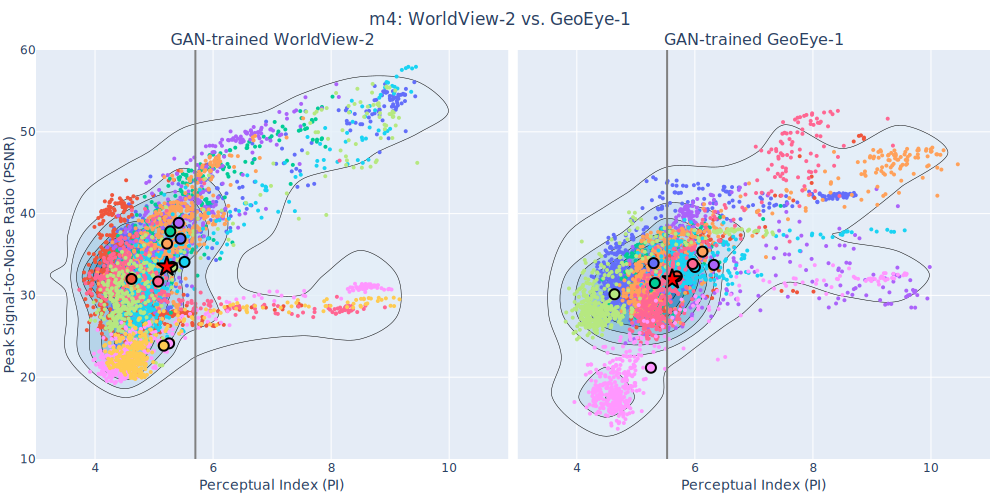

In [175]:
new_blues = px.colors.sequential.Blues
new_blues[0] = 'rgba(247,251,255, 0)'
new_blues

def pi_vs_psnr_subplot(fig, df, row, col, metric_x='PI', metric_y='PSNR', exclude=None, 
                       vertical_lines=False, vertical_line=None):
    if isinstance(exclude, str) or isinstance(exclude, list):
        df = df.loc[~df['image_UID'].str.contains(exclude)]
    
    image_UIDs = df['image_UID'].unique()
    #print(image_UIDs)
    if col == 1:
        showlegend = False
    else:
        showlegend = True
    
    for i, image_UID in enumerate(image_UIDs):

        image_df = df.loc[df['image_UID'] == image_UID, :]
        fig.add_trace(go.Scatter(x=image_df[metric_x], y=image_df[metric_y],
                                 mode='markers', opacity=1,
                                 marker=dict(size=4, color=PLOTLY_COLORS[i]),
                                 legendgroup=image_UID, name=image_UID[5:-15], 
                                 #hovertemplate='%{text}',
                                 hovertext=image_df['image_UID'] + image_df['tile_UID'],
                                 hoverinfo='text',
                                 showlegend=False),
                     row=row, col=col)

    fig.add_trace(go.Histogram2dContour(x=df[metric_x], y=df[metric_y], 
                                        colorscale=new_blues, opacity=1,
                                        nbinsx=10, nbinsy=10,
                                        autocontour=False,
                                        hoverinfo='skip',
                                        contours=dict(start=20, end=1000, size=100, coloring='fill'),
                                        showscale=False
                                       ), row=row, col=col)
    grand_means = df.mean()
    image_means = df.groupby('image_UID').mean()

    
    fig.add_trace(go.Scatter(x=image_means[metric_x], y=image_means[metric_y], 
                             mode='markers',
                             name='per-image mean',
                             showlegend=False,
                             marker=dict(size=10, color=PLOTLY_COLORS,
                                         line=dict(color='black', width=2))), 
                  row=row, col=col)
    fig.add_trace(go.Scatter(x=[grand_means[metric_x]], y=[grand_means[metric_y]], 
                             mode='markers', marker_symbol='star',
                             name='grand mean',
                             showlegend=False,
                             marker=dict(size=15, color='red',
                                         line=dict(color='black', width=2))), 
                  row=row, col=col)
    
    if vertical_line:
        fig.add_trace(go.Scatter(x=[vertical_line, vertical_line], y=[10, 60], 
                                 mode='lines', marker_color='gray', line_dash='solid',
                                 showlegend=False), row=row, col=col)

def pi_vs_psnr_density(df1, df2, title, metric_x='PI', metric_y='PSNR', 
                       subplot_titles=('A', 'B'), exclude=None, write_path=None, renderer=None, 
                       vertical_lines=False, vertical_line_1=None, vertical_line_2=None):
    fig = make_subplots(rows=1, cols=2, 
                        horizontal_spacing=0.01, 
                        shared_yaxes='all', shared_xaxes='all', subplot_titles=subplot_titles)
    
    pi_vs_psnr_subplot(fig, df1, row=1, col=1, metric_x=metric_x, metric_y=metric_y, exclude=exclude, 
                       vertical_lines=vertical_lines, vertical_line=vertical_line_1)
    pi_vs_psnr_subplot(fig, df2, row=1, col=2, metric_x=metric_x, metric_y=metric_y, exclude=exclude, 
                       vertical_lines=vertical_lines, vertical_line=vertical_line_2)
    
    #fig.update_xaxes(range=(3.5,14), title=dict(text=METRIC_NAMES[metric_x], standoff=5))
    fig.update_xaxes(range=(3,11), title=dict(text=METRIC_NAMES[metric_x], standoff=5))
    fig.update_yaxes(range=(10,60), title=dict(text=METRIC_NAMES[metric_y], standoff=0), col=1)
    fig.update_layout(title=dict(text=title, x=0.5, xanchor='center', yanchor='bottom'), 
                      legend=dict(yanchor="top", y=1, xanchor="left", x=3),
                      showlegend=True, 
                      width=1000, height=500, 
                      margin=dict(l=10, r=10, t=50, b=10))
    
    fig.update_layout(
        legend=dict(
            x=1, 
            xanchor='right',
            traceorder="normal", 
            font=dict(size=11)
        )
    )
    if isinstance(write_path, str):
        fig.write_image(write_path)
    fig.show(renderer=renderer)

if LAST_EPOCH:
    pi_vs_psnr_density(dfs['e01-4-final_epoch-gan-val-WV02'], 
                       dfs['e01-4-final_epoch-gan-val-GE01'], 
                       title='m4: WorldView-2 vs. GeoEye-1', 
                       metric_x='PI', metric_y='PSNR', 
                       subplot_titles=('GAN-trained WorldView-2', 'GAN-trained GeoEye-1'), exclude=None, 
                       write_path='results/plots/scatter-wv02-vs-ge01.svg', renderer='svg', vertical_lines=True,
                       vertical_line_1=df_mean.loc['e01-4-HR-val-WV02', 'PI'], 
                       vertical_line_2=df_mean.loc['e01-4-HR-val-GE01', 'PI'])
    #'results/plots/scatter-wv02-vs-ge01.svg' 
#
    #pi_vs_psnr_density(dfs['e01-4-final_epoch-pre-val-GE01'], 
    #                   dfs['e01-4-final_epoch-gan-val-GE01'], 
    #                   title='m4: Pretrained vs. GAN-trained', 
    #                   metric_x='PI', metric_y='PSNR', 
    #                   subplot_titles=('Pretrained GeoEye-1', 'GAN-trained GeoEye-1'), exclude=None)
    
    #pi_vs_psnr_density(dfs['e01-4-final_epoch-gan-val-GE01'], 
    #                   dfs['e06-4-final_epoch-gan-val-GE01'], 
    #                   title='m4 baseline vs. oversampled and augmented version (m4-os-aug) ', 
    #                   metric_x='PI', metric_y='PSNR', 
    #                   subplot_titles=('m4: GAN-trained GeoEye-1', 'm4-os-aug: GAN-trained GeoEye-1'), exclude=None, 
    #                   write_path='results/plots/scatter-m4-vs-m4-os-aug.svg', renderer='svg', vertical_lines=True, 
    #                   vertical_line_1=df_mean.loc['e01-4-HR-val-GE01', 'PI'], 
    #                   vertical_line_2=df_mean.loc['e01-4-HR-val-GE01', 'PI'])
    # 'results/plots/scatter-m4-vs-m4-os-aug.svg'
    
    #pi_vs_psnr_density(dfs['e06-4-final_epoch-gan-val-WV02'], 
    #                   dfs['e06-4-final_epoch-gan-val-GE01'], 
    #                   title='m4-os-aug: Evaluation on the Validation set', 
    #                   metric_x='PI', metric_y='PSNR', 
    #                   subplot_titles=('GAN-trained WorldView-2', 'GAN-trained GeoEye-1'), exclude=None, 
    #                   write_path='results/plots/scatter-final-1.svg', renderer='svg', vertical_lines=True, 
    #                   vertical_line_1=df_mean.loc['e01-4-HR-val-WV02', 'PI'], 
    #                   vertical_line_2=df_mean.loc['e01-4-HR-val-GE01', 'PI'])
    ## write_path='results/plots/scatter-final-1.svg', renderer='svg',
    
    #pi_vs_psnr_density(dfs['e07-4-final_epoch-gan-test-WV02'], 
    #                   dfs['e07-4-final_epoch-gan-test-GE01'], 
    #                   title='m4-os-aug: Final evaluation on Test set ', 
    #                   metric_x='PI', metric_y='PSNR', 
    #                   subplot_titles=('GAN-trained WorldView-2', 'GAN-trained GeoEye-1'), exclude=None, 
    #                   write_path='results/plots/scatter-final-2.svg', renderer='svg', vertical_lines=True, 
    #                   vertical_line_1=df_mean.loc['e07-4-HR-test-WV02', 'PI'], 
    #                   vertical_line_2=df_mean.loc['e07-4-HR-test-GE01', 'PI'])
    ## write_path='results/plots/scatter-final-2.svg', renderer='svg',

In [121]:
df_mean.loc['e07-4-HR-test-WV02', 'PI']

5.72

In [82]:
df_t = dfs['e01-4-final_epoch-gan-val-GE01']
df_t
df_t.loc[~df_t['image_UID'].str.contains('Toulon 2019_10_07')]

KeyError: 'e01-4-final_epoch-gan-val-GE01'

In [83]:
pi_vs_psnr_density(dfs['e01-4-final_epoch-pre-val-WV02'], 
                   dfs['e01-4-final_epoch-gan-val-WV02'],
                   title='WorldView-2 validation set')

KeyError: 'e01-4-final_epoch-pre-val-WV02'

In [84]:
df_t['image_UID'].str.contains('Toulon 2019_10_07')

0       False
1       False
2       False
3       False
4       False
        ...  
3784     True
3785     True
3786     True
3787     True
3788     True
Name: image_UID, Length: 3789, dtype: bool

In [ ]:
len(epochs)

In [ ]:
epochs